In [136]:
import pandas as pd
import numpy as np
import plotly.express as px

In [163]:
def load_star_hist(repos):
    dfs = []
    for rep in repos:
        owner, repo = rep.split("/")
        df = pd.read_csv(f"{owner}_{repo}_stars.csv", parse_dates=["starredAt"])
        dfs.append(df)
    return pd.concat(dfs)

repos = [
    "Significant-Gravitas/AutoGPT",
    "AUTOMATIC1111/stable-diffusion-webui",
    "xtekky/gpt4free",
    "Yidadaa/ChatGPT-Next-Web",
    "AntonOsika/gpt-engineer",
    "binary-husky/gpt_academic",
    "lencx/ChatGPT",
]

df = load_star_hist(repos)
df['starred_date'] = df['starredAt'].dt.date
df_daily = df.groupby(["full_name", "starred_date"], as_index=False).agg(stars=pd.NamedAgg(column="full_name", aggfunc="count"))

df_daily = df_daily.pivot_table(values="stars", columns="full_name", index="starred_date", fill_value=0)
df_daily = df_daily.cumsum().reset_index()
# df_daily = pd.melt(df_cum,  id_vars=['starred_date'], value_vars=list(df_cum.columns[1:]), value_name="stars")

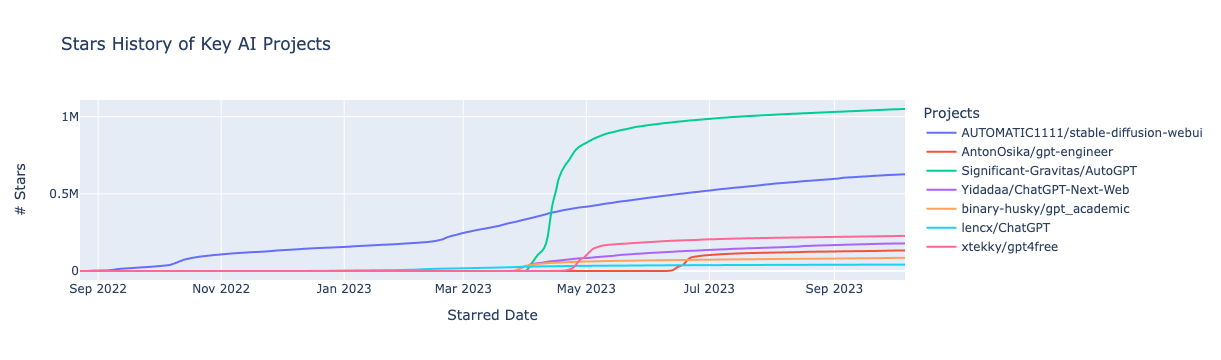

In [165]:
pd.options.plotting.backend = "plotly"
df_daily.plot(
    #kind='bar',
    x='starred_date',
    y=df_daily.columns[1:],
    title="Stars History of Key AI Projects",
    height=500,
    labels={
        "variable": "Projects",
        "value": "# Stars",
        "starred_date": "Starred Date",
    },
)

Text(0, 0.5, '#Stars')

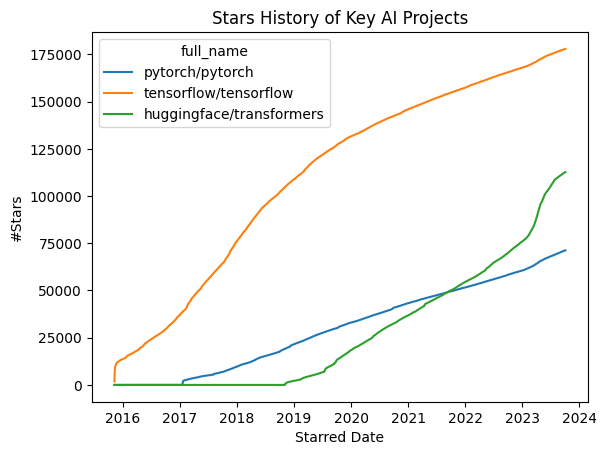

In [143]:
pd.options.plotting.backend = "matplotlib"
ax = df_daily.plot(
    x='starred_date',
    y=['pytorch/pytorch', 'tensorflow/tensorflow', 'huggingface/transformers'],
    title="Stars History of Key AI Projects",
)
ax.set_xlabel("Starred Date")
ax.set_ylabel("#Stars")